# TWITTER SOCIAL MEDIA MINING

Pertama proses import library yang diperlukan

In [ ]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer

from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings   


warnings.filterwarnings('ignore')
%matplotlib inline

Kemudian, import juga drive agar data bisa diambil dari google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengambil data Tweets.csv dan menyimpannya pada variabel dengan nama df

In [ ]:
df = pd.read_csv('./drive/My Drive/Colab Notebooks/nlp/UAS/Tweets.csv')

Melihat data teratas pada variabel df

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Melihat jumlah data yang unik pada variabel df

In [ ]:
df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

Mengubah data pada atribut tweet_created menjadi format tanggal dan waktu

In [ ]:
df['tweet_created'] = pd.to_datetime(df['tweet_created']).dt.date

In [ ]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

melihat waktu yang paling lama terdata dalam melakukan tweet

In [ ]:
df['tweet_created'].min()

Timestamp('2015-02-16 00:00:00')

melihat waktu yang paling baru dalam melakukan tweet

In [ ]:
df['tweet_created'].max()

Timestamp('2015-02-24 00:00:00')

Membuat variabel numberoftweets yang berisi jumlah tweet yang muncul berdasarkan tanggal tweet tersebut diunggah.

In [ ]:
numberoftweets = df.groupby('tweet_created').size()

In [ ]:
numberoftweets

tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
dtype: int64

Melihat persentase jumlah data yang kosong (null) pada setiap variabel atau atribut.

In [ ]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

Membuat diagram batang dari persebaran sentiment pada setiap tweet yang diunggah.

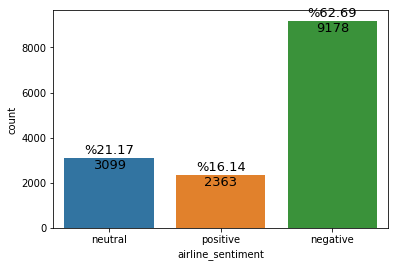

In [ ]:
def labels(ax, df, xytext=(0, 0)):
    for bar in ax.patches: 
        ax.annotate('%{:.2f}\n{:.0f}'.format(100*bar.get_height()/len(df),bar.get_height()), (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    size=13, xytext=xytext, 
                    textcoords='offset points')

ax = sns.countplot(data =df, x = "airline_sentiment");
labels(ax, df)

Membuat diagram batang untuk melihat jumlah tweet yang diunggah berdasarkan lokasinya.

Text(0, 0.5, 'Jumlah tweet')

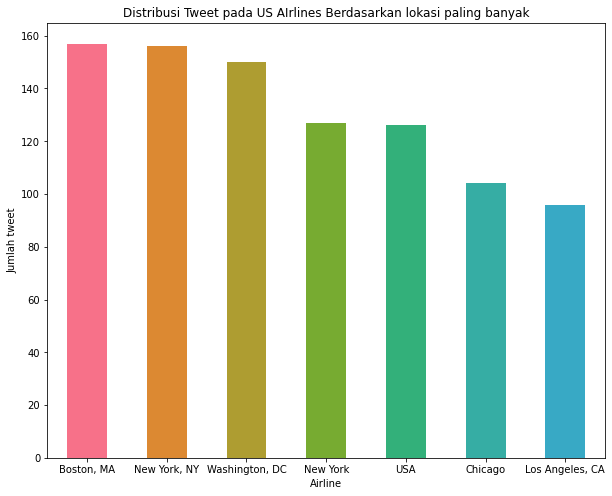

In [ ]:
from collections.abc import ValuesView
colors=sns.color_palette('husl',10)
pd.Series(df['tweet_location']).value_counts().head(7).plot(kind="bar",color=colors,figsize=(10,8),fontsize=10,rot=0,title='Distribusi Tweet pada US AIrlines Berdasarkan lokasi paling banyak')
plt.xlabel('Airline',fontsize=10)
plt.ylabel('Jumlah tweet',fontsize=10)

Membuat diagram batang untuk melihat jumlah tweet yang diunggah berdasarkan lokasinya. Namun, dari yang paling kecil.

Text(0, 0.5, 'Jumlah tweet')

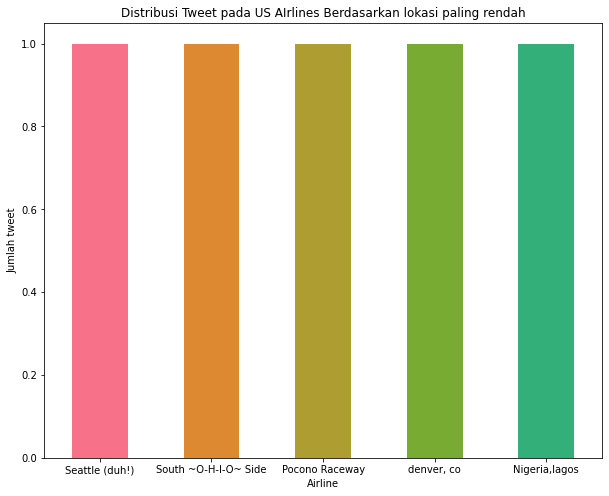

In [ ]:
from collections.abc import ValuesView
colors=sns.color_palette('husl',10)
pd.Series(df['tweet_location']).value_counts().tail(5).plot(kind="bar",color=colors,figsize=(10,8),fontsize=10,rot=0,title='Distribusi Tweet pada US AIrlines Berdasarkan lokasi paling rendah')
plt.xlabel('Airline',fontsize=10)
plt.ylabel('Jumlah tweet',fontsize=10)

Membuat diagram garis untuk melihat distribusi banyaknya tweet yang diunggah berdasarkan waktu.

Text(0, 0.5, 'Jumlah tweet')

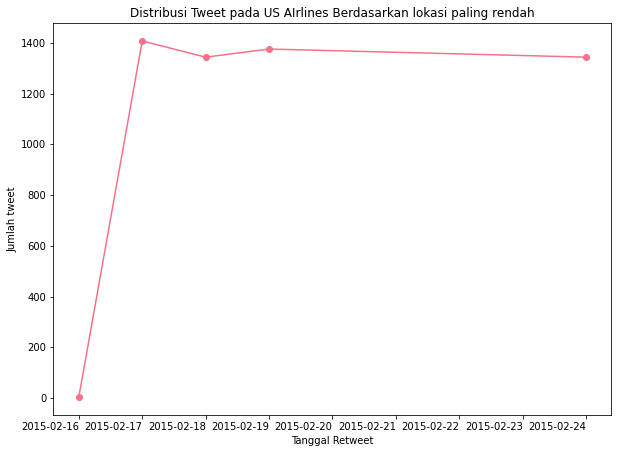

In [ ]:
from collections.abc import ValuesView
colors=sns.color_palette('husl',10)
pd.Series(df['tweet_created']).value_counts().tail(5).plot(kind="line",color=colors,figsize=(10,8),fontsize=10,marker='o',rot=0,title='Distribusi Tweet pada US AIrlines Berdasarkan lokasi paling rendah')
plt.xlabel('Tanggal Retweet',fontsize=10)
plt.ylabel('Jumlah tweet',fontsize=10)

Import library spacy (STOP_WORDS), spacy, dan string. Serta membuat fungsi dengan nama spacy_tokenizer untuk proses cleaning data.

In [31]:
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
import string
spacy_nlp = spacy.load('en_core_web_sm')

punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def spacy_tokenizer(sentence):
 
    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits adnd words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)
    
    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)
    
    #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)
    
    #creating token object
    tokens = spacy_nlp(sentence)
    
    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    
    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]
    
    #return tokens
    return tokens

Proses Cleaning data dan menyimpan datanya di variabel 'text_tokenized'.

In [32]:
print('Cleaning and Tokenizing....')
%time df['text_tokenized'] = df['text'].map(lambda x: spacy_tokenizer(x))

Cleaning and Tokenizing....
CPU times: user 2min 57s, sys: 636 ms, total: 2min 58s
Wall time: 3min 15s


Melihat data teratas pada df untuk melihat data text yang sudah di tokenized.

In [33]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,text_tokenized
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada),"[virginamerica, dhepburn]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),"[virginamerica, plus, add, commercial, experie..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada),"[virginamerica, today, mean, need, trip]"
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),"[virginamerica, aggressive, blast, obnoxious, ..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),"[virginamerica, big, bad, thing]"


Membuat variabel df_plot, untuk melihat 5 index teratas urutan data pada variabel text sebelumnya.

In [34]:
df_plot = df['text_tokenized']
df_plot[0:5]

0                            [virginamerica, dhepburn]
1    [virginamerica, plus, add, commercial, experie...
2             [virginamerica, today, mean, need, trip]
3    [virginamerica, aggressive, blast, obnoxious, ...
4                     [virginamerica, big, bad, thing]
Name: text_tokenized, dtype: object

Import library wordcloud untuk melakukan word cloud

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Menampilkan word cloud dari atribut text_tokenized

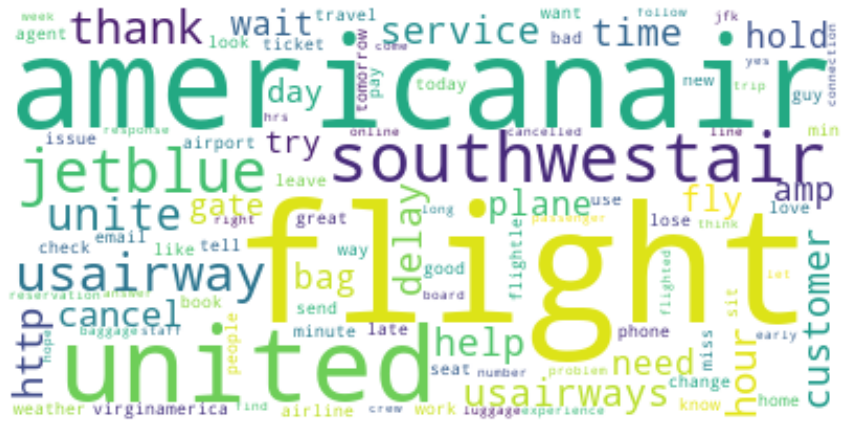

In [36]:
series = pd.Series(np.concatenate(df_plot)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Melihat korelasi data dengan menggunakan heatmap

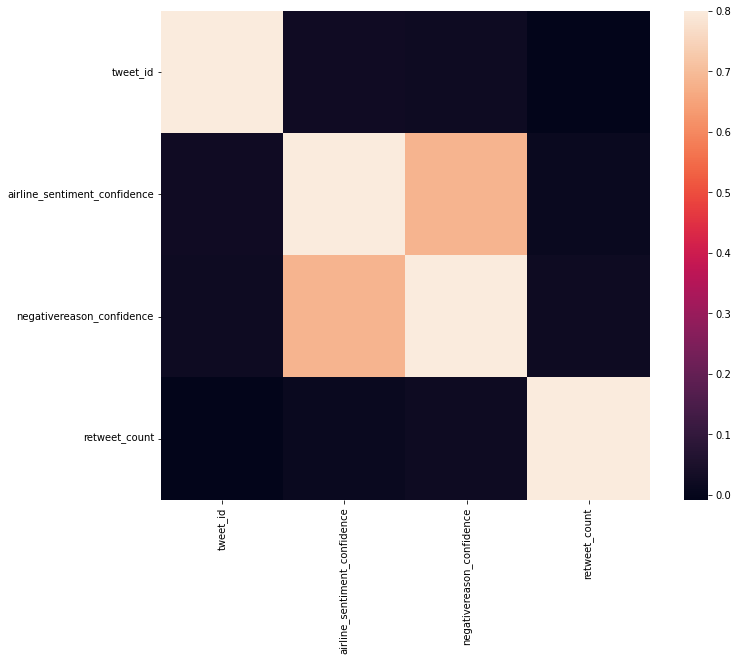

In [37]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);